In [5]:
from urllib import request
image_raw=open('challenge-7-chengdu.png','wb')
image_raw.write(request.urlopen('https://labfile.oss.aliyuncs.com/courses/1081/challenge-7-chengdu.png').read())
image_raw.close()

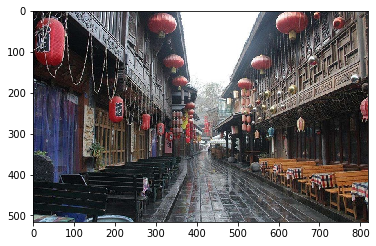

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

image=mpimg.imread('challenge-7-chengdu.png')
plt.imshow(image)

In [9]:
image.shape

(516, 819, 3)

In [10]:
import numpy as np
data=np.reshape(image,(image.shape[0]*image.shape[1],3))

In [11]:
data.shape,data[10]

((422604, 3), array([0.12941177, 0.13333334, 0.14901961], dtype=float32))

In [25]:
def get_variety(data):
    sets=[tuple(i) for i in data]
    num_variety=len(set(sets))
    return num_variety

get_variety(data),data[20]

(100109, array([0.24705882, 0.23529412, 0.2627451 ], dtype=float32))

In [28]:
from sklearn.cluster import MiniBatchKMeans

model=MiniBatchKMeans(n_clusters=10)
model.fit(data)
predict=model.predict(data)
new_colors=model.cluster_centers_[predict]

get_variety(new_colors)

10

In [31]:
new_colors.shape

(422604, 3)

In [34]:
new_colors=new_colors.reshape(image.shape[0],image.shape[1],3)

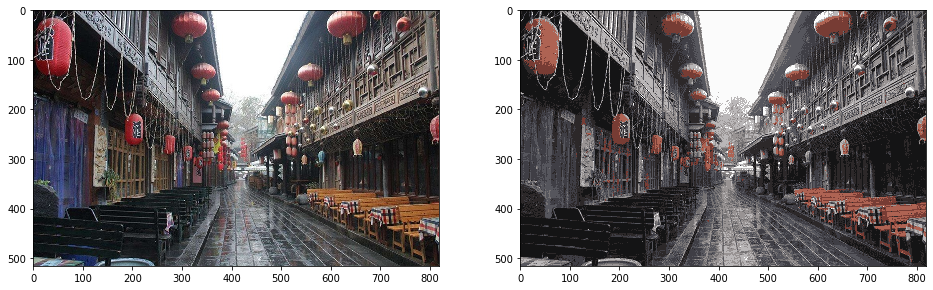

In [35]:
fig,ax=plt.subplots(1,2,figsize=(16,6))
ax[0].imshow(image)
ax[1].imshow(new_colors)